In [1]:
import numpy as np
import CoolProp.CoolProp as CP
import CoolProp.Plots as CPP
import matplotlib.pyplot as plt
import pandas as pd 
import warnings
from CoolProp.Plots.SimpleCycles import StateContainer, StatePoint
import CoolProp
warnings.filterwarnings('ignore')

In [2]:
from CoolProp.Plots import PropertyPlot


In [1]:
eta_t = 0.8
eta_c = 0.9
dp_evap=0.01
dp_cond=0.01


In [136]:
def expand(ts_in, final_p, eta, fluid):
    
    #isentropic state
    ts_out_s = StatePoint()
    ts_out_s.S = ts_in.S
    ts_out_s.P = final_p
    ts_out_s.H = CP.PropsSI('H','P',ts_out_s.P,'S',ts_out_s.S,fluid)
    ts_out_s.T = CP.PropsSI('T','P',ts_out_s.P,'S',ts_out_s.S,fluid)
    ts_out_s.D = CP.PropsSI('D','P',ts_out_s.P,'S',ts_out_s.S,fluid)
    
    #real state
    ts_out = StatePoint()
    ts_out.P = final_p 
    ts_out.H = ts_in.H - eta*(ts_in.H-ts_out_s.H) 
    ts_out.T = CP.PropsSI('T','P',ts_out.P,'H',ts_out.H,fluid)
    ts_out.D = CP.PropsSI('D','P',ts_out.P,'H',ts_out.H,fluid)
    ts_out.S = CP.PropsSI('S','P',ts_out.P,'H',ts_out.H,fluid)
    
    return ts_out

def compress(ts_in, final_p, eta, fluid):
    
    #isentropic state
    ts_out_s = StatePoint()
    ts_out_s.S = ts_in.S
    ts_out_s.P = final_p
    ts_out_s.H = CP.PropsSI('H','P',ts_out_s.P,'S',ts_out_s.S,fluid)
    ts_out_s.T = CP.PropsSI('T','P',ts_out_s.P,'S',ts_out_s.S,fluid)
    ts_out_s.D = CP.PropsSI('D','P',ts_out_s.P,'S',ts_out_s.S,fluid)
    
    #real state
    ts_out = StatePoint()
    ts_out.P = final_p 
    ts_out.H = ts_in.H + (1/eta)*(ts_out_s.H-ts_in.H) 
    
    print(ts_out.H,ts_out_s.H)
    ts_out.T = CP.PropsSI('T','P',ts_out.P,'H',ts_out.H,fluid)
    ts_out.D = CP.PropsSI('D','P',ts_out.P,'H',ts_out.H,fluid)
    ts_out.S = CP.PropsSI('S','P',ts_out.P,'H',ts_out.H,fluid)
    
    return ts_out
    

def condensor(ts_in, dp, Qout):
    ts_out = StatePoint()
    ts_out.P = ts_in.P*(1-dp) #pressure drop
    ts_out.H = ts_in.H  - Qout  #heat rejection
    ts_out.T = CP.PropsSI('T','P',ts_out.P,'H',ts_out.H,fluid)
    ts_out.D = CP.PropsSI('D','P',ts_out.P,'H',ts_out.H,fluid)
    ts_out.S = CP.PropsSI('S','P',ts_out.P,'H',ts_out.H,fluid)
    return ts_out

In [176]:
fluid = "Toluene"



#total conditions inlet turbine
ts_01 = StatePoint()

ts_01.T =  587.65 
ts_01.P = 3195000.0
ts_01.S = CP.PropsSI('S','P',P_01,'T',T_01,fluid)
ts_01.H = CP.PropsSI('H','P',P_01,'T',T_01,fluid)
ts_01.D = CP.PropsSI('D','P',P_01,'T',T_01,fluid)


cycle_states = StateContainer()
cycle_states = cycle_states.append(ts_01)

# cycle_states[1,'H']= H_02
# cycle_states[1,'S']= S_02
# cycle_states[1,"P"]= P_02
# cycle_states[1,"T"]= T_02
# cycle_states[1,"D"]= D_02
ts_02 = expand(cycle_states.get_point(0), 0.2e5,0.9, fluid )
cycle_states = cycle_states.append(ts_02)
ts_03 = condensor(cycle_states.get_point(1), 0.0,5e5)
cycle_states = cycle_states.append(ts_03)
ts_04 = compress(cycle_states.get_point(2),3195000,0.5,fluid)
cycle_states = cycle_states.append(ts_04)




# cycle_states[1,'H']= H_02
# cycle_states[1,'S']= S_02
# cycle_states[1,"P"]= P_02
# cycle_states[1,"T"]= T_02
# cycle_states[1,"D"]= D_02


# cycle_states[1,'H']= H_02
# cycle_states[1,'S']= S_02
# cycle_states[1,"P"]= P_02
# cycle_states[1,"T"]= T_02
# cycle_states[1,"D"]= D_02




(-18327.65074355279, -25369.24350992687)


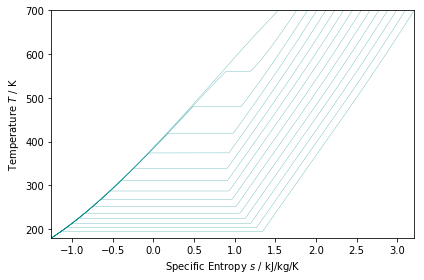

In [4]:
plot = PropertyPlot('Toluene', 'Ts')

plot.calc_isolines(CoolProp.iP)

plot.show()

In [51]:

test2

ValueError: T is not a valid number

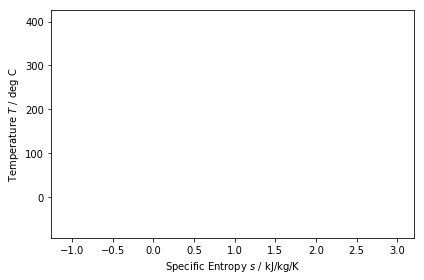

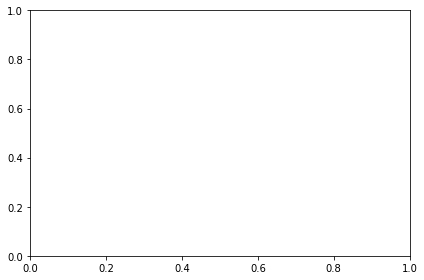

In [128]:
import CoolProp
from CoolProp.Plots import PropertyPlot
from CoolProp.Plots import SimpleRankineCycle
pp = PropertyPlot('HEOS::Toluene', 'TS', unit_system='EUR')
pp.calc_isolines(CoolProp.iQ, num=11)
cycle = SimpleRankineCycle('HEOS::Toluene', 'TS', unit_system='EUR')
T0 = 370
pp.state.update(CoolProp.QT_INPUTS,0.0,T0+15)
p0 = pp.state.keyed_output(CoolProp.iP)
T2 = 500
pp.state.update(CoolProp.QT_INPUTS,1.0,T2-150)
p2 = pp.state.keyed_output(CoolProp.iP)
cycle.simple_solve(T0, p0, T2, p2, 0.7, 0.8, SI=True)
cycle.steps = 50
sc = cycle.get_state_changes()
import matplotlib.pyplot as plt
plt.close(cycle.figure)
pp.draw_process(sc)
pp.calc_isolines(CoolProp.iP)
pp.draw()
# plot = PropertyPlot('Toluene', 'hs')

# plot.calc_isolines(CoolProp.iP)
# plot.draw_process(test2)

plot.show()

In [103]:
type(pp)

CoolProp.Plots.Plots.PropertyPlot

In [95]:
CoolProp.iP

20